In [1]:
import torch
import numpy as np
import tensorflow as tf

In [5]:

x = torch.tensor([1], dtype = torch.int64)
x = x.reshape(1,1)


In [12]:
test_public reciprocal

tensor([[1]])

In [1]:

a = tf.int32
a.max - a.min + 1 == 2 ** 32

True

In [8]:
y = torch.zeros(size = x.size())

In [12]:
x == y

RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'other'

In [6]:
a = 15297779988576995937
c = np.array([a])
c = c.astype(np.int64)

In [7]:
c

array([-3148964085132555679])

In [9]:
a = 15297779988576995937
c = np.array([a])
c = torch.from_numpy(c)

TypeError: can't convert np.ndarray of type numpy.uint64. The only supported types are: float64, float32, float16, int64, int32, int16, int8, uint8, and bool.

In [10]:
def gcd(a,b):
    if b==0:
        return a
    else:
        return gcd(b,a%b)

In [11]:
gcd(2,10)

2

In [13]:
2 ** 64

18446744073709551616

In [22]:
def relu(x):
    w0 = 0.44015372000819103
    w1 = 0.500000000
    w2 = 0.11217537671414643
    w4 = -0.0013660836712429923
    w6 = 9.009136367360004e-06
    w8 = -2.1097433984e-08


    x1 = x
    x2 = abs(x ** 0.5)
    x4 = x2 * x2
    x6 = x2 * x4
    x8 = x2 * x6

    y1 = x1 * w1
    y2 = x2 * w2
    y4 = x4 * w4
    y6 = x6 * w6
    y8 = x8 * w8

    z = y8 + y6 + y4 + y2 + y1 + w0

    return z


In [29]:
def tanh(x):
    """
    A Chebyshev polynomial approximation of the hyperbolic tangent function.
    """

    w0 = 0.0
    w1 = 0.852721056
    w3 = -0.12494112
    w5 = 0.010654528
    w7 = -0.000423424

    x1 = x
    x2 = abs(x ** 0.5)
    x3 = x2 * x1
    x5 = x2 * x3
    x7 = x2 * x5

    y1 = x1 * w1
    y3 = x3 * w3
    y5 = x5 * w5
    y7 = x7 * w7

    z = y7 + y5 + y3 + y1 + w0

    return z

<function matplotlib.pyplot.show(*args, **kw)>

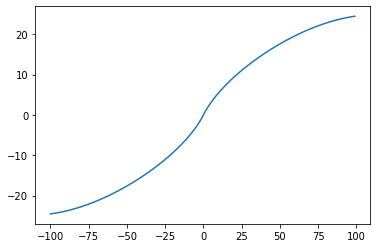

In [30]:
import matplotlib.pyplot as plt
x = [i for i in range(-100,100,1)]
y = [tanh(j) for j in x]
plt.plot(x,y)
plt.show

In [47]:
a = np.random.randint(low = 0, high = 100, size = [1,1,4,4], dtype = np.int64)
x = torch.tensor(a)

In [51]:
# res = torch.sum(a,dim = 0)
# print(res.size())

In [52]:
pool_height = 2
pool_width = 2
n, c, h, w = x.size()
x_reshaped = x.reshape([n, c, h // pool_height, pool_height, w // pool_width, pool_width])
print(x_reshaped.size())

torch.Size([1, 1, 2, 2, 2, 2])


In [53]:
x

tensor([[[[84, 93, 81, 47],
          [ 4, 76, 80, 31],
          [16, 30,  0, 57],
          [69, 61, 46, 58]]]])

In [74]:
x_reshaped

tensor([[[[[[84, 93],
            [81, 47]],

           [[ 4, 76],
            [80, 31]]],


          [[[16, 30],
            [ 0, 57]],

           [[69, 61],
            [46, 58]]]]]])

In [80]:
print(x_reshaped.size())
res = torch.sum(x_reshaped,dim=3)
print(res.size())
res = torch.sum(res,dim=4)
print(res.size())
print(res)

torch.Size([1, 1, 2, 2, 2, 2])
torch.Size([1, 1, 2, 2, 2])
torch.Size([1, 1, 2, 2])
tensor([[[[257, 239],
          [176, 161]]]])


In [72]:
tfx = tf.constant(x)
tfx1 = tf.reshape(tfx,[n, c, h // pool_height, pool_height, w // pool_width, pool_width])
tfx2  = tf.reduce_sum(tfx1,axis = 3)
tfx2  = tf.reduce_sum(tfx2,axis = 4)

In [78]:
with tf.Session() as sess:
    res = sess.run(tfx2)
    print(tfx2.shape)
    print(res)

(1, 1, 2, 2)
[[[[257 239]
   [176 161]]]]


In [89]:
inp = torch.randn(1, 1, 9, 9)
inp_unf = torch.nn.functional.unfold(input = inp, kernel_size =(3, 3)) 
# 这里的unfold是函数，而Unfold是层，使用差不多
print(inp_unf.shape)



torch.Size([1, 9, 49])


In [92]:

def im2col(x: tf.Tensor,
           h_filter: int,
           w_filter: int,
           padding: str,
           stride: int) -> tf.Tensor:
  """Generic implementation of im2col on tf.Tensors."""

  with tf.name_scope('im2col'):

    # we need NHWC because tf.extract_image_patches expects this
    nhwc_tensor = tf.transpose(x, [0, 2, 3, 1])
    channels = int(nhwc_tensor.shape[3])

    # extract patches
    patch_tensor = tf.extract_image_patches( nhwc_tensor,
                    ksizes=[1, h_filter, w_filter, 1],
                    strides=[1, stride, stride, 1],
                    rates=[1, 1, 1, 1],
                    padding=padding
                )
    
    # change back to NCHW
    patch_tensor_nchw = tf.reshape(tf.transpose(patch_tensor, [3, 1, 2, 0]),
                                   (h_filter, w_filter, channels, -1))

    # reshape to x_col
    x_col_tensor = tf.reshape(tf.transpose(patch_tensor_nchw, [2, 0, 1, 3]),
                              (channels * h_filter * w_filter, -1))

    return x_col_tensor

In [16]:
np.random.seed(0)
a = np.random.randint(low = 0, high = 100, size = [6,1,8,8], dtype = np.int64)

x = tf.constant(a)
h_filter,w_filter = 2,2
stride= 2
x = tf.transpose(x, [0, 2, 3, 1])
channels = int(x.shape[3])
print(x.shape)
# extract patches
patch_tensor = tf.extract_image_patches( x,
                ksizes=[1, h_filter, w_filter, 1],
                strides=[1, stride, stride, 1],
                rates=[1, 1, 1, 1],
                padding = 'VALID')
# x = tf.transpose(x, [0, 2, 3, 1])

(6, 8, 8, 1)


In [17]:
with tf.Session() as sess:
    res = sess.run(patch_tensor)
    print(patch_tensor.shape)
#     print(res)

(6, 4, 4, 4)


In [145]:

x2 = torch.tensor(a, dtype = torch.float)
inp_unf = torch.nn.functional.unfold(input = x2, kernel_size =(3, 3)) 
print(inp_unf.shape)



torch.Size([1, 9, 4])


In [24]:
x = tf.constant(a)
print(x.shape)
tf.split(x,3,axis = 0)

(6, 1, 8, 8)


[<tf.Tensor 'split_1:0' shape=(2, 1, 8, 8) dtype=int64>,
 <tf.Tensor 'split_1:1' shape=(2, 1, 8, 8) dtype=int64>,
 <tf.Tensor 'split_1:2' shape=(2, 1, 8, 8) dtype=int64>]

In [36]:
tx = torch.tensor(a)
print(tx.size())
c= tx.split(3,dim=0)

print([i.size() for i in c])

torch.Size([6, 1, 8, 8])
[torch.Size([3, 1, 8, 8]), torch.Size([3, 1, 8, 8])]


In [39]:
bb = tx.size()

In [41]:
bb[0]

6

In [47]:
dir(torch.int32)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'is_floating_point']

In [45]:
tf.int32.size

4

In [49]:
torch.int32.__sizeof__()

88

In [50]:
str(torch.int32)

'torch.int32'

In [54]:
len(x.shape)

4

In [58]:
len(tx.shape)

4

In [60]:
ran = tf.range(64)

In [61]:
with tf.Session() as sess:
    res = sess.run(ran)
    print(res.shape)
    print(res)

(64,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [62]:
tf.expand_dims(ran,-1)

<tf.Tensor 'ExpandDims:0' shape=(64, 1) dtype=int32>

In [63]:
ran

<tf.Tensor 'range_1:0' shape=(64,) dtype=int32>

In [72]:
ccc = np.expand_dims(a,-1)

In [93]:
a = np.arange(10)
a = a.reshape(2,5)
tx = torch.tensor(a)
tfx = tf.constant(a)


In [99]:
res_cumsum = torch.cumsum(tx, dim = 0, out=None, dtype=None)
res_reduce_sum = torch.sum(tx,dim = 0)
print(res_reduce_sum)
print(res_reduce_sum.size())

tensor([ 5,  7,  9, 11, 13])
torch.Size([5])


In [96]:
temp = tf.cumsum(tfx, axis=0, exclusive=None, reverse=None)
res_equal = tf.equal(temp, 0)
res_reduce_sum = tf.reduce_sum(tfx,axis = 0,keepdims=False)
with tf.Session() as sess:
    res = sess.run(res_reduce_sum)
    print(res.shape)
    print(res)

(5,)
[ 5  7  9 11 13]


In [84]:
torch.equal(tx,0)

TypeError: equal(): argument 'other' (position 2) must be Tensor, not int

In [86]:
c = (tx == 0)

In [87]:
tx = torch.tensor(a)

tensor([ True, False, False, False, False, False, False, False, False, False])

In [103]:
tx.permute(0,1)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [105]:
ls = [1,2,3,4,5]
ls[...,0]

TypeError: list indices must be integers or slices, not tuple

In [156]:
b = bin(5072804246271848426)
b = b[2:]
b = b[::-1]
b

'010101111111011000000100010100111010100100011100011001100110001'

In [128]:

def binarize(tensor: tf.Tensor,
             bitsize = None) -> tf.Tensor:
  """Extract bits of values in `tensor`, returning a `tf.Tensor` with same
  dtype."""


  with tf.name_scope('binarize'):
    bitsize = bitsize or (tensor.dtype.size * 8)

    bit_indices_shape = [1] * len(tensor.shape) + [bitsize]
    bit_indices = tf.range(bitsize, dtype=tensor.dtype)
    bit_indices = tf.reshape(bit_indices, bit_indices_shape)
    

    val = tf.expand_dims(tensor, -1)
    print(val.shape)
    print(bit_indices.shape)
    val  = tf.bitwise.right_shift(val, bit_indices)
    val = tf.bitwise.bitwise_and(val, 1)

    assert val.dtype == tensor.dtype
    return val

In [132]:
b = tf.constant(6, dtype = tf.int64)
bb = binarize(b)
with tf.Session() as sess:
    print(sess.run(bb))

(1,)
(64,)
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [149]:
c = '0101011111110110000001000101001110101001000111000110011001100010'
c = '0b' + c[::-1]

In [151]:
int(c, 2)


5072804246271848426

In [157]:
tx

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [158]:
tx[..., 0]

tensor([0, 5])

In [160]:
torch.tensor([[[[44, 47, 64, 67],
          [67,  9, 83, 21],
          [36, 87, 70, 88],
          [88, 12, 58, 65]]]])


tensor([[[[44, 47, 64, 67],
          [67,  9, 83, 21],
          [36, 87, 70, 88],
          [88, 12, 58, 65]]]])

In [161]:
tx

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

tensor([[4, 3, 2, 1, 0],
        [9, 8, 7, 6, 5]])

In [172]:
temp  = torch.flip(,dims = [1])
temp = torch.cumsum(tx, dim = 1)
temp  = torch.flip(temp,dims = [1])
temp

tensor([[10, 10,  9,  7,  4],
        [35, 30, 24, 17,  9]])

In [218]:
temp = tf.cumsum(tfx, axis=-1, reverse=True, exclusive=True)
with tf.Session() as sess:
    res = sess.run(temp)
#     print(res.shape)
    print(res)

[[10  9  7  4  0]
 [30 24 17  9  0]]


In [179]:
tx

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [182]:

torch.cumsum(tx, dim = 1)

tensor([[ 0,  1,  3,  6, 10],
        [ 5, 11, 18, 26, 35]])

In [ ]:
temp = torch.zeros()

In [225]:
pad = torch.zeros_like(tx).sum(dim = 1)
pad.unsqueeze_(dim = 1)
temp = torch.cat([tx, pad], dim = 1)
temp  = torch.flip(temp ,dims = [1])
temp = torch.cumsum(temp, dim = 1)
temp  = torch.flip(temp ,dims = [1])
split_size = temp.size(-1) -1
temp = torch.split(temp,split_size_or_sections =split_size, dim = -1)
temp = temp[0]
temp 

tensor([[10, 10,  9,  7,  4],
        [35, 30, 24, 17,  9]])

In [199]:
pad.unsqueeze(dim = 1).size()

torch.Size([2, 1])

In [201]:
tx.size()

torch.Size([2, 5])

In [215]:
temp

tensor([[10, 10,  9,  7,  4,  0],
        [35, 30, 24, 17,  9,  0]])

tensor([[10, 10,  9,  7,  4],
        [35, 30, 24, 17,  9]])